### <center>**Extracción de muertes por fecha del año 2020** </center>

##### Importamos librerías

In [2]:
import json
import requests
from datetime import datetime, timedelta
import pandas as pd

##### Obtenemos los permisos de [Rapidapi](https://rapidapi.com/axisbits-axisbits-default/api/covid-19-statistics/)

In [3]:


url = "https://covid-19-statistics.p.rapidapi.com/reports/total"

querystring = {"date":"2020-02-02"}

headers = {
	"X-RapidAPI-Key": "521a9a1cb9mshb2ed089bbc4e3cbp1b8bfbjsn1a39d05b0d58",
	"X-RapidAPI-Host": "covid-19-statistics.p.rapidapi.com"
}



##### Iteramos cada fecha desde el 1 de Febrero de 2020 hasta el 1 de Febrero de 2021

In [4]:
'''
for i in range(1000):
    querystring = {"date":"2020-04-01"}
    response = requests.request("GET", url, headers=headers, params=querystring)'''
df_all = pd.DataFrame()

start_date = datetime(2020, 2, 1)
end_date = datetime(2020, 12, 31)
for i in range(0, 365):
    current_date = start_date + timedelta(days=i)
    date_string = current_date.strftime("%Y-%m-%d")
    querystring = {"date": date_string}
    response = requests.request("GET", url, headers=headers, params=querystring)
    data = response.json()
    df = pd.DataFrame(data['data'], index=[0])
    df_all = pd.concat([df_all, df])



In [5]:
df_all.to_csv("COVID_STATISTICS_2020.csv",sep=";",index=False,encoding="utf-8")#GUARDAMOS EL DATAFRAME EN UN ARCHIVO CSV
a=pd.read_csv("COVID_STATISTICS_2020.csv",sep=";",encoding="utf-8",na_values=["0"])# LEEMOS EL ARCHIVO
a

,date,last_update,confirmed,confirmed_diff,deaths,deaths_diff,recovered,recovered_diff,active,active_diff,fatality_rate
0,2020-02-01,2020-02-01 19:53:00,12038,2106,259,46,284,62,11495,1998,0.0215
1,2020-02-02,2020-02-02 23:53:02,16787,4749,362,103,472,188,15953,4458,0.0216
2,2020-02-03,2020-02-03 23:43:02,19881,3092,426,64,623,151,18832,2877,0.0214
3,2020-02-04,2020-02-04 23:43:01,23892,4010,492,66,852,229,22548,3715,0.0206
4,2020-02-05,2020-02-05 23:43:02,27636,3743,564,72,1124,272,25948,3399,0.0204
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-01-26,2021-01-27 05:23:41,100270534,552121,2157349,17421,55387771,330516,42725414,204184,0.0215
361,2021-01-27,2021-01-28 05:22:24,100866031,595497,2174129,16780,55890582,502811,42801320,75906,0.0216
362,2021-01-28,2021-01-29 05:22:23,101453596,587565,2191078,16949,56043612,153030,43218906,417586,0.0216
363,2021-01-29,2021-01-30 05:22:49,102065710,612114,2206336,15258,56408773,365161,43450601,231695,0.0216


In [6]:
a["month"] = pd.PeriodIndex(a["date"],freq = "M")
a


,date,last_update,confirmed,confirmed_diff,deaths,deaths_diff,recovered,recovered_diff,active,active_diff,fatality_rate,month
0,2020-02-01,2020-02-01 19:53:00,12038,2106,259,46,284,62,11495,1998,0.0215,2020-02
1,2020-02-02,2020-02-02 23:53:02,16787,4749,362,103,472,188,15953,4458,0.0216,2020-02
2,2020-02-03,2020-02-03 23:43:02,19881,3092,426,64,623,151,18832,2877,0.0214,2020-02
3,2020-02-04,2020-02-04 23:43:01,23892,4010,492,66,852,229,22548,3715,0.0206,2020-02
4,2020-02-05,2020-02-05 23:43:02,27636,3743,564,72,1124,272,25948,3399,0.0204,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-01-26,2021-01-27 05:23:41,100270534,552121,2157349,17421,55387771,330516,42725414,204184,0.0215,2021-01
361,2021-01-27,2021-01-28 05:22:24,100866031,595497,2174129,16780,55890582,502811,42801320,75906,0.0216,2021-01
362,2021-01-28,2021-01-29 05:22:23,101453596,587565,2191078,16949,56043612,153030,43218906,417586,0.0216,2021-01
363,2021-01-29,2021-01-30 05:22:49,102065710,612114,2206336,15258,56408773,365161,43450601,231695,0.0216,2021-01


In [7]:
z = a.sort_values('date').groupby('month').last().reset_index()
z

,month,date,last_update,confirmed,confirmed_diff,deaths,deaths_diff,recovered,recovered_diff,active,active_diff,fatality_rate
0,2020-02,2020-02-29,2020-02-29 23:53:02,86013,1883,2941,69,39782,3071,43290,-1257,0.0342
1,2020-03,2020-03-31,2020-03-31 23:49:27,857487,75095,42107,4525,178028,13468,637352,57102,0.0491
2,2020-04,2020-04-30,2020-05-01 02:32:28,3256846,62944,233388,5750,1014753,42034,2008705,15160,0.0717
3,2020-05,2020-05-31,2020-06-01 02:32:46,6166946,107929,372035,2909,2641329,76636,3153582,28384,0.0603
4,2020-06,2020-06-30,2020-07-01 04:33:52,10475838,173786,511253,5748,5353272,117459,4611313,50579,0.0488
5,2020-07,2020-07-31,2020-08-01 04:36:27,17591968,296430,679439,6268,10330958,198379,6581571,91783,0.0386
6,2020-08,2020-08-31,2020-09-01 04:28:31,25484767,262058,850535,4140,16819592,201424,7814640,56494,0.0334
7,2020-09,2020-09-30,2020-10-01 04:23:42,33881272,320191,1012980,6404,23551788,250526,9316504,63261,0.0299
8,2020-10,2020-10-31,2020-11-01 04:36:19,46015562,431411,1194906,6040,30761539,1071320,14059117,-645949,0.0260
9,2020-11,2020-11-30,2020-12-01 05:26:18,63236804,506078,1467987,8670,40528816,401191,21240001,96217,0.0232


##### Presentamos un gráfico de las muertes por mes en 365 días empezando en Febrero 2020

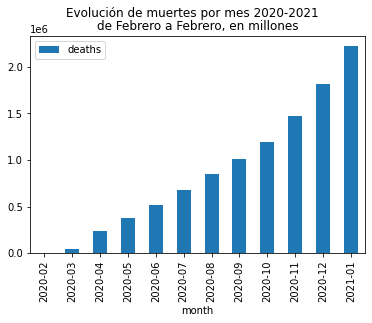

In [32]:
import matplotlib.pyplot as plt
z.plot(kind = "bar", x = "month", y = "deaths")
plt.title("de Febrero a Febrero, en millones")
plt.suptitle("Evolución de muertes por mes 2020-2021")
"Evolución de muertes por mes"
plt.show()

#### Datos estadisticos


In [11]:
#Tasa de crecimiento
#Muertes
for i in range(0,11):
    if i <=10:
        xd=z.loc[i, 'deaths']
        dx=z.loc[i+1, 'deaths']
        print((((dx-xd)/xd)*100).round(2),'%')


1331.72 %
454.27 %
59.41 %
37.42 %
32.9 %
25.18 %
19.1 %
17.96 %
22.85 %
23.85 %
22.1 %


##### Con los datos hallados, llegamos ala conclusion de que la mayor tasa de crecimiento con respecto a la cantidad de fallecidos registrado fue de Febrero a Marzo con un 1331.72%, siendo logico ya que fue el inicio de la pandemia y a partir del 3 mes los datos no tienen variaciones de gran magnitud oscilando entre 20% a 40%, esto logicamente por las restricciones dadas.

In [12]:
#Casos confirmados
for i in range(0,11):
    if i <=10:
        xd=z.loc[i, 'confirmed']
        dx=z.loc[i+1, 'confirmed']
        print((((dx-xd)/xd)*100).round(2),'%')

896.93 %
279.81 %
89.35 %
69.87 %
67.93 %
44.87 %
32.95 %
35.81 %
37.42 %
31.92 %
22.96 %


##### Con los datos hallados, llegamos ala conclusion de que la mayor tasa de crecimiento con respecto a la cantidad de casos confirmados  fue de Febrero a Marzo con un 896.93%, siendo logico ya que fue el inicio de la pandemia y a partir del 3er mes los datos  tienen variaciones un poco mas grandes oscilando entre 20 %a 70%, esto logicamente por las restricciones dadas.

In [27]:
'''
data = json.loads(response.text)
print(data["data"]["date"], data["data"]["last_update"])

data = json.loads(z2)
df = pd.DataFrame(data["data"])
print(df)

for item in data["data"]:
    print(item["iso"], item["name"])
    '''

'\ndata = json.loads(response.text)\nprint(data["data"]["date"], data["data"]["last_update"])\n\ndata = json.loads(z2)\ndf = pd.DataFrame(data["data"])\nprint(df)\n\nfor item in data["data"]:\n    print(item["iso"], item["name"])\n    '